In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 不显示坐标轴
    plt.title(title) # 图像题目
    plt.show()

最简单的图像金字塔可以通过不断地删除图像的偶数行和偶数列得到。

# pyrDown函数

OpenCV提供了函数cv2.pyrDown()，用于实现图像高斯金字塔操作中的向下采样。

o.shape= (1800, 2880)


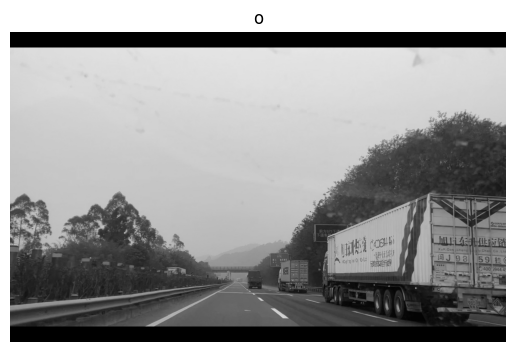

r1.shape= (900, 1440)


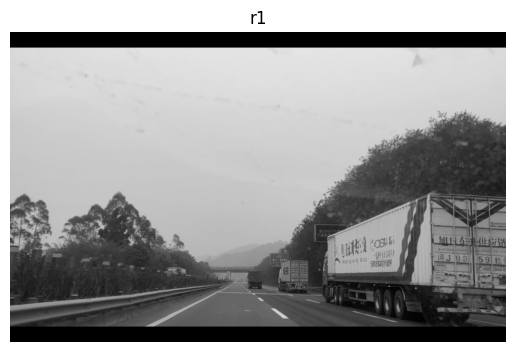

r2.shape= (450, 720)


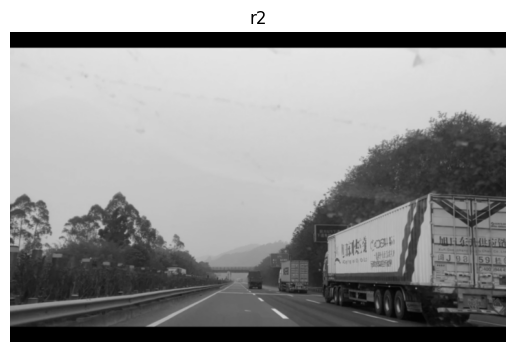

r3.shape= (225, 360)


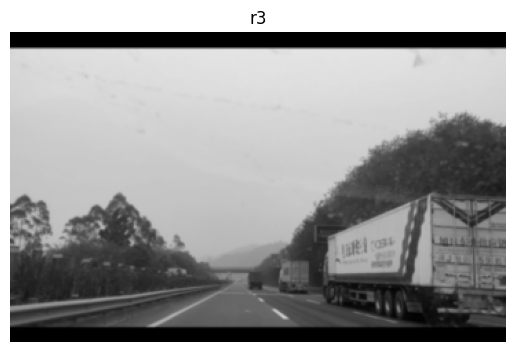

In [7]:
o=cv2.imread("images/highway.jpg", cv2.IMREAD_GRAYSCALE)
r1=cv2.pyrDown(o)
r2=cv2.pyrDown(r1)
r3=cv2.pyrDown(r2)
print("o.shape=", o.shape)
show(o, 'o')
print("r1.shape=", r1.shape)
show(r1, 'r1')
print("r2.shape=", r2.shape)
show(r2, 'r2')
print("r3.shape=", r3.shape)
show(r3, 'r3')

# pyrUp函数

在OpenCV中，使用函数cv2.pyrUp()实现图像金字塔操作中的**向上采样**。

对图像向上采样时，在每个像素的右侧、下方分别插入零值列和零值行，得到一个偶数行、偶数列（即新增的行、列）都是零值的新图像New。接下来，用向下采样时所使用的高斯滤波器对新图像New进行滤波，得到向上采样的结果图像。

r2.shape= (450, 720)


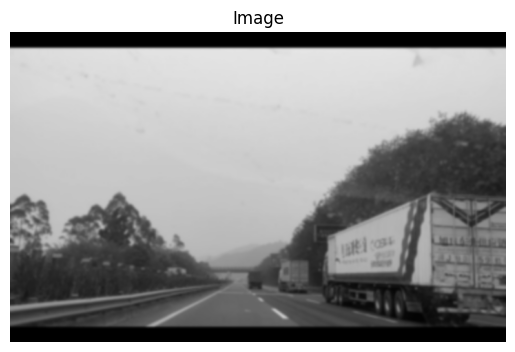

r1.shape= (900, 1440)


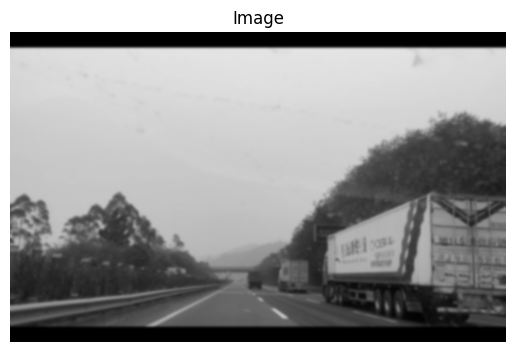

o.shape= (1800, 2880)


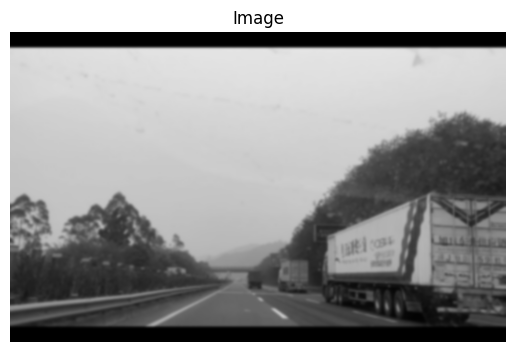

In [9]:
r2 = cv2.pyrUp(r3)
r1 = cv2.pyrUp(r2)
o = cv2.pyrUp(r1)
print("r2.shape=", r2.shape)
show(r2)
print("r1.shape=", r1.shape)
show(r1)
print("o.shape=", o.shape)
show(o)

# 拉普拉斯金字塔

为了在向上采样时能够恢复具有较高分辨率的原始图像，就要获取在采样过程中所丢失的信息，这些丢失的信息就构成了拉普拉斯金字塔。

拉普拉斯金字塔的作用在于，能够恢复高分辨率的图像。